Check envinroment

In [1]:
import sys
print sys.version

2.7.15rc1 (default, Nov 12 2018, 14:31:15) 
[GCC 7.3.0]


#Set up Colab

This notebook was prepared in Colab. To load data and python scripts in Colab, some additional steps are to be performed. 
First, data archive and python scripts archive were uploaded in Google Drive and shared for public access.
Then files were downloaded to Colab from Google Drive by means of the link. At last, the uploaded archives were extracted.



In [2]:
# install pydrive to load daa and script files 
!pip install pydrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import tarfile
import zipfile

In [0]:
# authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# load and exctract data files in Colab

# shared link to data archive file
# https://drive.google.com/open?id=1iqg3npFMm-7EeqDbZbwOHJbms01lAjbC 

download = drive.CreateFile({'id': '1iqg3npFMm-7EeqDbZbwOHJbms01lAjbC'})
download.GetContentFile('aclImdb_v1.tar.gz')

# unzip
if not os.path.exists('data'):
  os.makedirs("data")

tar = tarfile.open('aclImdb_v1.tar.gz', "r:gz")
tar.extractall('data/')
tar.close()

In [0]:
# load and extract python scripts

# shared link to script files
# https://drive.google.com/open?id=1_bpTo5grQVfOd9DuXSBxmPGVkve_XVTc

download_scr = drive.CreateFile({'id': '1_bpTo5grQVfOd9DuXSBxmPGVkve_XVTc'})
download_scr.GetContentFile('scripts.zip')

zip_ref = zipfile.ZipFile('scripts.zip', "r")
zip_ref.extractall()
zip_ref.close()

# Dataset description

The dataset, that is used to create the model, is a Large Movie Review Dataset v1.0. The dataset along with its description is available at http://ai.stanford.edu/~amaas/data/sentiment/



# Load data

Read raw text data.

In [0]:
import utils
from sklearn.model_selection import train_test_split

In [0]:
# load data

train_path = os.path.join("data", "aclImdb", "train")
test_path = os.path.join("data", "aclImdb", "test")

train = utils.loaddata(train_path)
test = utils.loaddata(test_path)

In [9]:
print train[1][0], train[0][0]
print train[1][12500], train[0][12500]

0 Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
1 Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through 

Split train data into two subsets - train data and validation data in the proportion 70:30. Validation data We'll train models on the train subset and check model accuracy on the validation subset. Quality of the final model will be checked on test subset.

In [0]:
# split train set into train and validation 
train_data, val_data, train_target, val_target = train_test_split(train[0], train[1], shuffle=True, test_size=0.3, random_state=123)

test_data = test[0]
test_target = test[1]

In [11]:
train_data[0:3]

[u'I created my own reality by walking out of the theater I was roped in by my girlfriend into going to this dreck with her mom. We (my g-friend and I) walked out about an hour into it. What a load of pseudo scientific new age jargon.<br /><br />Sub atomic particles are thoughts? By taping labels to bottles of water and blessing it by a Buddhist monk it grew little pretty crystals? A drop of 25% in the murder rate in DC happened when a bunch of folks meditated. Wow, what a rigorous scientific study. I\'m sure that someone ate cheerios for four days straight during the same time. Should we conclude that eating cheerios caused a drop in the murder rate? <br /><br />Hogwash, hooey, bull pucky! <br /><br />BTW- It was funded by the Ramtha cult, the leader of which was one of the "experts" which were interview by the filmmakers. No ulterior motives here, right?',
 u'The most horrible retelling of a great series. It should not have been named Battlestar Galactica, because it\'s only the same

#Preprocess data

The following rules are applied during preprocessing:

1. characters are  converted to lowercase 
2. contracted forms are replaced with the corresponding full forms
3. some special characters like (), {}, !,, etc are replaced with space
4. characters that are not digits, letters, space, underscore or "#", "+" are removed
5. stopwords are removed.

To filter stopwords, stopwords corpus from nltk python package is used. Words 'no', 'nor', 'not' are assumed to be important for sentiment analysis and are excluded from the stopwords corpus.

Patterns to be replaced are defined with regular expressions. More details on the replacement rules can be found in "process.py" file.


In [12]:
from preprocess import TextPreprocessor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# preprocess data
prp = TextPreprocessor()

X_train_tok = [prp.clean_text(text) for text in train_data]
print('train subset is preprocessed')
X_val_tok = [prp.clean_text(text) for text in val_data]
print('validation subset is preprocessed')
X_test_tok = [prp.clean_text(text) for text in test_data]
print('test subset is preprocessed')

train subset is preprocessed
validation subset is preprocessed
test subset is preprocessed


In [14]:
# example of the preproccessed text
X_train_tok[0:3]

[u'created reality walking theater roped girlfriend going dreck mom g friend walked hour load pseudo scientific new age jargon sub atomic particles thoughts taping labels bottles water blessing buddhist monk grew little pretty crystals drop 25 murder rate dc happened bunch folks meditated wow rigorous scientific study sure someone ate cheerios four days straight time conclude eating cheerios caused drop murder rate hogwash hooey bull pucky btw funded ramtha cult leader one experts interview filmmakers no ulterior motives right',
 u'horrible retelling great series not named battlestar galactica name alone many changes changes characters turned male female black asian cylon way attract female audiences already strong female characters could made stronger gone egyptian feeling gone quest earth lack cylons go terminator rejects takes away film especially one made fembot granted original show lot cheese large following tried hold onto following give fans nothing work basically spit face mak

Let's check what is length of review texts. We'll do calculations for train dataset.

 Mean  838.9772571428572
std  643.7283114992067


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


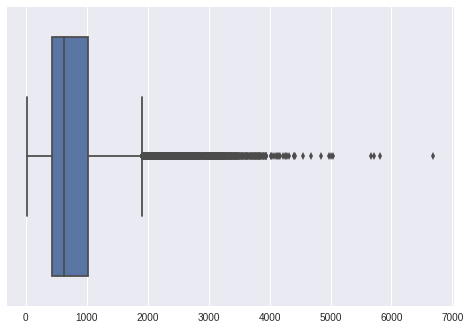

In [16]:
import seaborn as sns 
import numpy as np

review_len = [len(text) for text in X_train_tok]
print "Mean ", np.mean(review_len) 
print "std ", np.std(review_len)

sns.boxplot(review_len)

From the plot above it follows that the 75th percentile approximately equals to 1000. It means that 75% of lengths of review texts in X_train_tok set is below 1000. 

# Approach based on logistic regression

The idea is to create tf-idf features for documents (i.e reviews) and apply logistic regression algorithm to a matrix of tf-idf features. Instead of tf-idf, bag-of-words approach can be used to generate document features. Tf-idf approach was selected because usually it provides better results. 

When creating a matrix with tf-idf features for sentiment analysis, it is reasonable to take into account both 1-and 2- grams. Let's check number of ngrams and their frequency in the corpus:

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=5)
bag_of_words = cnt_vect.fit_transform(X_train_tok)

print "Total number of ngrams: ", bag_of_words.shape[1]

# ngrams in the corpus
sum_words = bag_of_words.toarray().sum(axis=0)

# ngrams and their frequencies in the corpus
ngrams_dict = {word: freq for word, freq in zip(cnt_vect.get_feature_names(), sum_words)}
# sort ngrams by the frequency in reverse order
ngrams_dict_sorted = sorted(ngrams_dict.items(), key=lambda x: x[1], reverse=True)

Total number of ngrams:  65821


In [18]:
N = 12000
ngrams_dict_sorted[N:][0:5]

[(u'gets better', 28),
 (u'cracker', 28),
 (u'tin', 28),
 (u'matter much', 28),
 (u'gusto', 28)]

Top of N=12000 ngrams has frequency higher than 30. Other ngrams are  less frequent.  It seems rather reasonable to preserve a top of N=12000 ngrams in the dictionary. 

Create tf-idf features :

In [0]:
from models import Model

m = Model()

In [20]:
%%time
# get tfidt features
X_train_tfidf_tok, tfidf_vect = m.tfidf_train(X_train_tok, ngram_range=(1,2), max_df=0.9, 
                                       min_df=5, max_features=12000)

CPU times: user 22.5 s, sys: 391 ms, total: 22.9 s
Wall time: 22.9 s


In [0]:
X_val_tfidf_tok = m.tfidf_trans(tfidf_vect, X_val_tok)
X_test_tfidf_tok = m.tfidf_trans(tfidf_vect, X_test_tok)

Fit LogisticRegression classifier

In [22]:
%%time
clf_regr_tok = m.log_regression_train(X_train_tfidf_tok, train_target)

CPU times: user 1.05 s, sys: 672 ms, total: 1.73 s
Wall time: 24.3 s


Check the classifier accuracy on validation set:

In [23]:
lr_acc_val, lr_cvs_val = m.check_acc(clf_regr_tok, X_val_tfidf_tok, val_target)

Mean accuracy:  0.8912
Cross validation score:  [0.868      0.86733333 0.88933333 0.87733333 0.88266667]


In [24]:
lr_acc_test, lr_cvs_test = m.check_acc(clf_regr_tok, X_test_tfidf_tok, test_target)

Mean accuracy:  0.87648
Cross validation score:  [0.8882 0.8792 0.8864 0.8848 0.8726]


Calculate confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(val_target, m.pred_labeles(clf_regr_tok, X_val_tfidf_tok)).ravel()
print lr_tn, lr_fp, lr_fn, lr_tp

3249 456 360 3435


Save results of model evaluation in DataFrame

In [0]:
import pandas as pd
import numpy as np
models_acc = pd.DataFrame({'model_name': ["log_regr"], 
                           'acc_on_val': [lr_acc_val], \
                           'cross_val_score_mean_val': [np.mean(lr_cvs_val)], \
                           'acc_on_test': [lr_acc_test], 
                           'cross_val_score_mean_test': [np.mean(lr_cvs_test)],
                           'TN': lr_tn,
                           'FP': lr_fp,
                           'FN': lr_fn,
                           'TP': lr_tp                      
                          })

In [30]:
models_acc

,FN,FP,TN,TP,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,360,456,3249,3435,0.87648,0.8912,0.88224,0.876933,log_regr


Other classifiers such as SVC, Random Forest, AdaBoost,  GradientBoostingClassifier were tested as well. They have lower accuracy. Tuning parameters of these classifiers require much time due to sparsity of feature matrix. Results of their evaluation are not listed here.

Upload models files to Google disk

In [0]:
from models import MODEL_PATH

def upload_to_GD(file_list):
  for file in file_list:
    upload = drive.CreateFile({'title': file})
    upload.SetContentFile(file)
    upload.Upload()

file_list = [MODEL_PATH["TFIDF_VECTORIZER"], MODEL_PATH["LOG_REGR_CLASSIFIER"]]
upload_to_GD(file_list)

# Sentiment analysis with Doc2Vec model

Doc2Vec is an algorithm to convert sentences / documents into numeric vectors. The idea is to get numeric representation of movie reviews and then apply a classification algorithm to the numeric vectors. Length of vectors is taken equal to 100.




In [0]:
from gensim.models.doc2vec import Doc2Vec
from doc2vec_model import Doc2Vec_Model, DOC2VEC_MODEL_PATH


d2v_model = Doc2Vec_Model()

In [0]:
%%time
# train and save doc2vec model
import multiprocessing
cores=multiprocessing.cpu_count()

d2v_model.doc2vec_train(X_train_tok, vec_size=100, max_epochs=10, workers=cores)

iteration 0
iteration 2
iteration 4


In [0]:
# load model
d2v = Doc2Vec.load(DOC2VEC_MODEL_PATH["DOC2VEC"])

In [0]:
%%time
# get numeric representation for documents from corpus
X_train_d2v = d2v_model.doc2vec_infer(d2v, X_train_tok)
X_val_d2v = d2v_model.doc2vec_infer(d2v, X_val_tok)
X_test_d2v = d2v_model.doc2vec_infer(d2v, X_test_tok)

Train logistic regression on vector representation of the documents and evaluate the model

In [0]:
%%time
lr_d2v_tok = m.log_regression_train(X_train_d2v, train_target)
d2v_acc_val, d2v_cvs_val = m.check_acc(lr_d2v_tok, X_val_d2v, val_target)

In [0]:
d2v_acc_test, d2v_cvs_test = m.check_acc(lr_d2v_tok, X_test_d2v, test_target)

Calculate confusion matrix

In [0]:
d2v_tn, d2v_fp, d2v_fn, d2v_tp = confusion_matrix(val_labels, predicted_classes.flatten()).ravel()
print d2v_tn, d2v_fp, d2v_fn, d2v_tp

Save results of model evaluation

In [0]:
models_acc_d2 = pd.DataFrame({'model_name': ["d2v"], 
                           'acc_on_val': [d2v_acc_val], \
                           'cross_val_score_mean_val': [np.mean(d2v_cvs_val)], \
                           'acc_on_test': [d2v_acc_test], 
                           'cross_val_score_mean_test': [np.mean(d2v_cvs_test)]
                           'TN': d2v_tn,
                           'FP': d2v_fp,
                           'FN': d2v_fn,
                           'TP': d2v_tp
                             })

In [0]:
models_acc = models_acc.append(models_acc_d2)
models_acc

Save the trained model on Google disk

In [0]:
file_list = [DOC2VEC_MODEL_PATH["DOC2VEC"]]
upload_to_GD(file_list)

#Sentiment analysis with TextBlob library

TextBlob library can generate *polarity* *score* for given text. Polarity score is a float within the range [-1;1]

In [0]:
from textblob import TextBlob

# get sentiment property for train, validation and test subsets
train_pol = np.asarray([TextBlob(text).sentiment[0] for text in X_train_tok]).reshape(-1, 1)
val_pol = np.asarray([TextBlob(text).sentiment[0] for text in X_val_tok]).reshape(-1, 1)
test_pol = np.asarray([TextBlob(text).sentiment[0] for text in X_test_tok]).reshape(-1, 1)

Apply logistic regression classifier to polarity scores to classify reviews. For classification a rule based on threshold can be applied. But I found that logistic classifier has better accuracy.

In [40]:
%%time
pol_clf = m.log_regression_train(train_pol, train_target)
pol_acc_val, pol_cvs_val = m.check_acc(pol_clf, val_pol, val_target)

Mean accuracy:  0.7764
Cross validation score:  [0.782      0.77866667 0.77866667 0.78266667 0.78133333]
CPU times: user 565 ms, sys: 77.6 ms, total: 643 ms
Wall time: 2.5 s


In [41]:
pol_acc_test, pol_cvs_test = m.check_acc(pol_clf, test_pol, test_target)

Mean accuracy:  0.77196
Cross validation score:  [0.7796 0.7654 0.772  0.7616 0.7788]


Calculate confusion matrix

In [0]:
pol_tn, pol_fp, pol_fn, pol_tp = confusion_matrix(val_labels, predicted_classes.flatten()).ravel()
print pol_tn, pol_fp, pol_fn, pol_tp

In [0]:
models_acc_pol = pd.DataFrame({'model_name': ["pol"], 
                           'acc_on_val': [pol_acc_val], \
                           'cross_val_score_mean_val': [np.mean(pol_cvs_val)], \
                           'acc_on_test': [pol_acc_test], 
                           'cross_val_score_mean_test': [np.mean(pol_cvs_test)],
                           'TN': pol_tn,
                           'FP': pol_fp,
                           'FN': pol_fn,
                           'TP': pol_tp})

In [50]:
models_acc = models_acc.append(models_acc_pol)
models_acc

,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,0.87648,0.891200,0.88224,0.876933,log_regr
0,0.87176,0.882533,0.87300,0.879867,d2v
0,0.77196,0.776400,0.77148,0.780667,pol


# Neural netwoks models

Check frequencies of words.

In [14]:
import numpy as np
import itertools
from collections import Counter

# find frequencies of words in X_train_tok dataset
words_counts = Counter(list(itertools.chain.from_iterable(list(map(lambda x: x.split(), X_train_tok)))))

print "Mean ", np.mean(words_counts.values()) 
print "std ", np.std(words_counts.values())

Mean  33.5034287832453
std  334.7098464408595


In [15]:
# sort word freauencies
sorted_counts = sorted(list(words_counts.values()), reverse=True)
sorted_counts[10000:10005]

[21, 21, 21, 21, 21]

It means that top of 10000 words has frequency higher that 22. We'll include top 10000 words in the dictionary.

In [16]:
from nn_models import NN_Data_Prepare, NN_Model, NN_Train_Predict, NN_MODEL_PATH

DICT_SIZE = 10000
# create dictionary
nn_data_prepare = NN_Data_Prepare(dict_size=DICT_SIZE)
nn_data_prepare.create_dict(X_train_tok)

Using TensorFlow backend.


In [0]:
# convert lables to float format
train_labels = nn_data_prepare.vectorized_labels(train_target)
val_labels = nn_data_prepare.vectorized_labels(val_target)
test_labels = nn_data_prepare.vectorized_labels(test_target)

We'll create two neural networks models.

## Neural network model 1

The first neural network is a dense neural network. It gets one-hot representation of text reviews as input. One-hot representation of a text is a binary vector of length equal to dictionary size. The *i*-th component of the vector equals to 1 if the *i*-th word from the dictionary presents in the text.  

In [18]:
%%time
# create one-hot-encoding representation of input data
X_train_ohe = nn_data_prepare.set_ohe(X_train_tok)
X_val_ohe = nn_data_prepare.set_ohe(X_val_tok)
X_test_ohe = nn_data_prepare.set_ohe(X_test_tok)

CPU times: user 49min 21s, sys: 805 ms, total: 49min 21s
Wall time: 49min 23s


Create dense model

In [20]:
#from nn_models import NN_Model
import nn_models
nn_model=nn_models.NN_Model()
dense_model = nn_model.dense_model()
dense_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total para

Fit model

In [31]:
nn_train = NN_Train_Predict()
hist = nn_train.compile_and_fit_model(dense_model, X_train_ohe, train_labels, X_val_ohe, val_labels, path_to_save=NN_MODEL_PATH["DENSE_MODEL"])

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 5s 271us/step - loss: 0.1842 - binary_accuracy: 0.9353 - val_loss: 0.3957 - val_binary_accuracy: 0.8875
Epoch 2/20
17500/17500 [==============================] - 4s 254us/step - loss: 0.1503 - binary_accuracy: 0.9461 - val_loss: 0.4204 - val_binary_accuracy: 0.8849
Epoch 3/20
17500/17500 [==============================] - 4s 253us/step - loss: 0.1362 - binary_accuracy: 0.9515 - val_loss: 0.4428 - val_binary_accuracy: 0.8843


Evaluate the model

In [50]:
from keras.models import load_model
dense_model = load_model(NN_MODEL_PATH["DENSE_MODEL"])
dense_loss_val, dense_acc_val = nn_train.model_evaluate(dense_model, X_val_ohe, val_labels)
print "Validation set. loss: ", dense_loss_val, ", accuracy: ", dense_acc_val 
dense_loss_test, dense_acc_test = nn_train.model_evaluate(dense_model, X_test_ohe, test_labels)
print "Test set. loss: ", dense_loss_test, ", accuracy: ", dense_acc_test 

7500/7500 [==============================] - 1s 128us/step
Validation set. loss:  0.3956817221800486 , accuracy:  0.8874666666348775
25000/25000 [==============================] - 3s 103us/step
Test set. loss:  0.4294009905424714 , accuracy:  0.87188


Calculate confusion matrix

In [0]:
# get predicted class labels
dense_predicted_classes = nn_train.model_predict_classes(dense_model, X_val_ohe)

In [0]:
dense_tn, dense_fp, dense_fn, dense_tp = confusion_matrix(val_labels, dense_predicted_classes.flatten()).ravel()
print dense_tn, dense_fp, dense_fn, dense_tp

Save results of evaluation

In [0]:
models_acc_dense_model = pd.DataFrame({'model_name': ["dense_model"], 
                           'acc_on_val': dense_acc_val, \
                           'cross_val_score_mean_val': None, \
                           'acc_on_test': dense_acc_test, 
                           'cross_val_score_mean_test': None,
                           'TN': dense_tn,
                           'FP': dense_fp,
                           'FN': dense_fn,
                           'TP': dense_tp })

In [66]:
models_acc = models_acc.append(models_acc_dense_model)
models_acc

,acc_on_test,acc_on_val,cross_val_score_mean_test,cross_val_score_mean_val,model_name
0,0.87648,0.891200,0.88224,0.876933,log_regr
0,0.87188,0.887467,NaN,NaN,dense_model


Save the trained model on Google disk

In [0]:
file_list = [NN_MODEL_PATH["DENSE_MODEL"]]

upload_to_GD(file_list)

## Neural network model 2

This neural netowrk is a convolutional neural network (CNN). The text review should be converted in numeric format when each word from the text is replaced with its numeric code. Words that are not in the dictionary, are thrown away.

In [67]:
%%time
# create numeric representation of input data
X_train_numbers = nn_data_prepare.set_to_numbers(X_train_tok)
X_val_numbers = nn_data_prepare.set_to_numbers(X_val_tok)
X_test_numbers = nn_data_prepare.set_to_numbers(X_test_tok)

CPU times: user 51min 6s, sys: 6.79 s, total: 51min 13s
Wall time: 51min 10s


Sequences that are fed in CNN should have the same length. Let's check length of the resulting numeric representations for the training set.

Mean  109.29611428571428
std  79.95513939910177


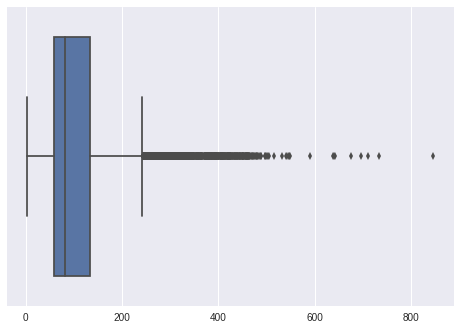

In [73]:
X_train_len = np.asarray([len(x) for x in X_train_numbers])
print "Mean ", np.mean(X_train_len) 
print "std ", np.std(X_train_len)

sns.boxplot(X_train_len)

From the plot above it follows that almost all numeric representations of reviews has less than 500 elements. So let's pad all sequences to the length of 500.

In [0]:
MAXLEN = 500
# get padded sequences
X_train_padded = nn_data_prepare.padded_set(X_train_numbers, maxlen=MAXLEN)
X_val_padded = nn_data_prepare.padded_set(X_val_numbers, maxlen=MAXLEN)
X_test_padded = nn_data_prepare.padded_set(X_test_numbers, maxlen=MAXLEN)

Create cnn model

In [80]:
reload(nn_models)
cnn_model = nn_model.cnn_model()
cnn_model.summary()

NameError: ignored

Fit the model

In [0]:
nn_train = NN_Train_Predict()
hist = nn_train.compile_and_fit_model(dense_model, X_train_ohe, train_labels, X_val_ohe, val_labels, path_to_save=NN_MODEL_PATH["DENSE_MODEL"])

Evaluate the model

In [0]:
from keras.models import load_model
cnn_model = load_model(NN_MODEL_PATH["CNN_MODEL"])
cnn_loss_val, cnn_acc_val = nn_train.model_evaluate(cnn_model, X_val_ohe, val_labels)
print "Validation set. loss: ", cnn_loss_val, ", accuracy: ", cnn_acc_val 
cnn_loss_test, cnn_acc_test = nn_train.model_evaluate(cnn_model, X_test_ohe, test_labels)
print "Test set. loss: ", cnn_loss_test, ", accuracy: ", cnn_acc_test 

Calculate confusion matrix

In [0]:
# get predicted class labels
cnn_predicted_classes = nn_train.model_predict_classes(cnn_model, X_val_ohe)

In [0]:
cnn_tn, cnn_fp, cnn_fn, cnn_tp = confusion_matrix(val_labels, cnn_predicted_classes.flatten()).ravel()
print cnn_tn, cnn_fp, cnn_fn, cnn_tp

Save result of evaluation

In [0]:
models_acc_cnn_model = pd.DataFrame({'model_name': ["cnn_model"], 
                           'acc_on_val': cnn_acc_val, \
                           'cross_val_score_mean_val': None, \
                           'acc_on_test': cnn_acc_test, 
                           'cross_val_score_mean_test': None,
                           'TN': cnn_tn,
                           'FP': cnn_fp,
                           'FN': cnn_fn,
                           'TP': cnn_tp })

In [0]:
models_acc = models_acc.append(models_acc_cnn_model)
models_acc

Save trained model on Google disk

In [0]:
file_list = [NN_MODEL_PATH["CNN_MODEL"]]

upload_to_GD(file_list)

(107.33857142857143, 80.126088123402)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


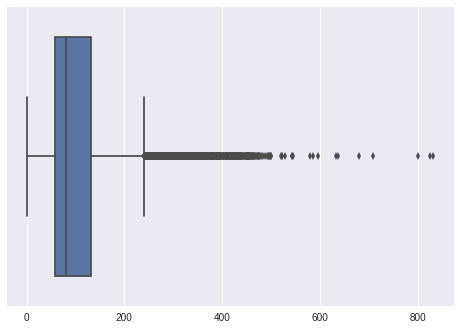

In [58]:
import seaborn as sns
sns.boxplot(result)

In [0]:
MAXLEN = 500
# get padded sequences
X_train_padded = nn_data_prepare.padded_set(X_train_numbers, maxlen=MAXLEN)
X_val_padded = nn_data_prepare.padded_set(X_val_numbers, maxlen=MAXLEN)
X_test_padded = nn_data_prepare.padded_set(X_test_numbers, maxlen=MAXLEN)

In [0]:
import matplotlib.pyplot as plt
ax=plt.boxplot(result1)
plt.show()

In [0]:
nn_data_prepare1 = NN_Data_Prepare(dict_size=100)
x = ["unimaginative tut galactica foul asd tut", "unimaginative tut galactica foul asd tut"]
x0 = ["unimaginative tut galactica foul asd tut akjdwql", "qwehkjv unimaginative tut galactica foul asd tut"]
nn_data_prepare1.create_dict(x)
x1 = nn_data_prepare1.set_to_numbers(x0)
print nn_data_prepare1.words_to_index
print x1
x2 = nn_data_prepare1.padded_set(x1, maxlen=8)
print x2

{'unimaginative': 1, 'galactica': 2, 'tut': 0, 'foul': 3, 'asd': 4}
[array([1, 2, 3, 4]), array([1, 2, 3, 4])]
[[6 6 6 6 1 2 3 4]
 [6 6 6 6 1 2 3 4]]


In [0]:
nn_models =  NN_Models()
base_model = nn_models.baseline_model()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
base_model.summary()

In [118]:
nn_models =  NN_Models()
dnn_emd = nn_models.dnn_emb()
dnn_emd.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_12 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 300)               4800300   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
___________________________

In [168]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_33 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_88 (Dense)             (None, 100)               1600100   
_________________________________________________________________
dropout_43 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_44 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 101       
Total para

In [133]:
dnn_emd = nn_models.dnn_emb(hid_out=250)
nn_train = NN_Train(batch_size=64)
hist = nn_train.compile_and_fit_model(dnn_emd, X_train_emb, train_labels, X_val_emb, val_labels, lr=0.001)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 4s 235us/step - loss: 0.4126 - binary_accuracy: 0.7988 - val_loss: 0.3039 - val_binary_accuracy: 0.8779
Epoch 2/20
17500/17500 [==============================] - 3s 171us/step - loss: 0.1250 - binary_accuracy: 0.9553 - val_loss: 0.3744 - val_binary_accuracy: 0.8717
Epoch 3/20
17500/17500 [==============================] - 3s 172us/step - loss: 0.0211 - binary_accuracy: 0.9933 - val_loss: 0.7101 - val_binary_accuracy: 0.8665


In [178]:
cnn = nn_models.dnn_emb(hid_out=100)
nn_train = NN_Train(batch_size=32)
hist = nn_train.compile_and_fit_model(cnn, X_train_emb, train_labels, X_val_emb, val_labels, lr=0.001)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 8s 479us/step - loss: 0.4399 - binary_accuracy: 0.7773 - val_loss: 0.2920 - val_binary_accuracy: 0.8796
Epoch 2/20
17500/17500 [==============================] - 6s 314us/step - loss: 0.1268 - binary_accuracy: 0.9587 - val_loss: 0.3534 - val_binary_accuracy: 0.8679
Epoch 3/20
17500/17500 [==============================] - 6s 315us/step - loss: 0.0179 - binary_accuracy: 0.9955 - val_loss: 0.6314 - val_binary_accuracy: 0.8665


In [0]:
nn_models =  NN_Models()
base_model = nn_models.baseline_model(output=16)

nn_train = NN_Train(batch_size=512)
hist = nn_train.compile_and_fit_model(base_model, X_train, train_labels, X_val, val_labels, lr=0.001)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 5s 266us/step - loss: 0.6270 - binary_accuracy: 0.6515 - val_loss: 0.5170 - val_binary_accuracy: 0.8237
Epoch 2/20
17500/17500 [==============================] - 1s 80us/step - loss: 0.4967 - binary_accuracy: 0.7977 - val_loss: 0.4003 - val_binary_accuracy: 0.8748
Epoch 3/20
17500/17500 [==============================] - 1s 80us/step - loss: 0.4018 - binary_accuracy: 0.8533 - val_loss: 0.3344 - val_binary_accuracy: 0.8788
Epoch 4/20
17500/17500 [==============================] - 1s 80us/step - loss: 0.3315 - binary_accuracy: 0.8877 - val_loss: 0.3082 - val_binary_accuracy: 0.8829
Epoch 5/20
17500/17500 [==============================] - 1s 81us/step - loss: 0.2725 - binary_accuracy: 0.9080 - val_loss: 0.3001 - val_binary_accuracy: 0.8844
Epoch 6/20
17500/17500 [==============================] - 1s 81us/step - loss: 0.2305 - binary_accuracy: 0.9281 - val_loss: 0.3229 - val_binary_a

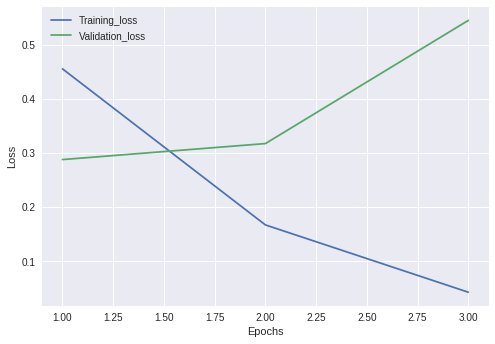

In [165]:
import matplotlib.pyplot as plt
loss = hist["loss"]
val_accuracy = hist["val_binary_accuracy"]
val_loss = hist["val_loss"]
acc = hist["binary_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, label="Training_loss")
plt.plot(epochs, val_loss, label="Validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

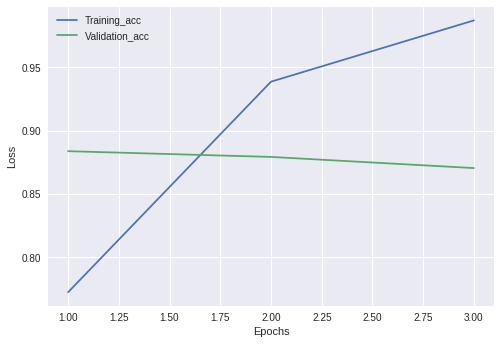

In [166]:
plt.plot(epochs, acc, label="Training_acc")
plt.plot(epochs, val_accuracy, label="Validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [0]:
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 323,233
Trainable params: 323,233
Non-trainable params: 0
_________________________________________________________________


In [0]:
#base_model.compile(optimizers.RMSprop(lr=0.001),
 #                  loss="binary_crossentropy",
 #                  metrics=[metrics.binary_accuracy])
#base_model.fit(X_train, train_labels, validation_data=(X_val, val_labels), epochs=20, batch_size=512)

dnn_model.compile(optimizers.RMSprop(lr=0.001),
                   loss="binary_crossentropy",
                   metrics=[metrics.binary_accuracy])
dnn_model.fit(X_train, train_labels, validation_data=(X_val, val_labels), epochs=20, batch_size=512)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 1s 77us/step - loss: 0.4171 - binary_accuracy: 0.8298 - val_loss: 0.4439 - val_binary_accuracy: 0.8147
Epoch 2/20
17500/17500 [==============================] - 1s 43us/step - loss: 0.4074 - binary_accuracy: 0.8319 - val_loss: 0.4400 - val_binary_accuracy: 0.8147
Epoch 3/20
17500/17500 [==============================] - 1s 42us/step - loss: 0.4030 - binary_accuracy: 0.8333 - val_loss: 0.4383 - val_binary_accuracy: 0.8139
Epoch 4/20
17500/17500 [==============================] - 1s 39us/step - loss: 0.4006 - binary_accuracy: 0.8335 - val_loss: 0.4367 - val_binary_accuracy: 0.8153
Epoch 5/20
17500/17500 [==============================] - 1s 42us/step - loss: 0.3984 - binary_accuracy: 0.8344 - val_loss: 0.4361 - val_binary_accuracy: 0.8147
Epoch 6/20
17500/17500 [==============================] - 1s 43us/step - loss: 0.3971 - binary_accuracy: 0.8339 - val_loss: 0.4351 - val_binary_ac

In [0]:
nn_train = NN_Train(batch_size=512)
#nn_train = NN_Train(batch_size = 2, shuffle=False)
#t = nn_train.batch_generator(X_train, train_labels)
#t = nn_train.batch_generator(X_train[0:9], np.asarray(range(0, X_train[0:9].shape[0])))
n = 10
#nn_train.fit_model(base_model, X_train[0:n], train_labels[0:n], X_val[0:n], val_labels[0:n])
nn_train.fit_model(base_model, X_train, train_labels, X_val, val_labels)

Epoch 1/20
34/34 [==============================] - 5s 153ms/step - loss: 0.4584 - binary_accuracy: 0.8611 - val_loss: 0.6896 - val_binary_accuracy: 0.8181
Epoch 2/20
34/34 [==============================] - 3s 100ms/step - loss: 0.4651 - binary_accuracy: 0.8517 - val_loss: 0.7239 - val_binary_accuracy: 0.8191
Epoch 3/20
34/34 [==============================] - 3s 94ms/step - loss: 0.4178 - binary_accuracy: 0.8556 - val_loss: 0.7884 - val_binary_accuracy: 0.8147
Epoch 4/20
34/34 [==============================] - 3s 101ms/step - loss: 0.4103 - binary_accuracy: 0.8540 - val_loss: 0.7536 - val_binary_accuracy: 0.8055
Epoch 5/20
34/34 [==============================] - 3s 103ms/step - loss: 0.4984 - binary_accuracy: 0.8567 - val_loss: 0.6950 - val_binary_accuracy: 0.8189
Epoch 6/20
34/34 [==============================] - 3s 99ms/step - loss: 0.4247 - binary_accuracy: 0.8618 - val_loss: 0.6001 - val_binary_accuracy: 0.8251
Epoch 7/20
34/34 [==============================] - 4s 109ms/step 

In [0]:
nn_train.fit_model(dnn_model, X_train, train_labels, X_val, val_labels)

Epoch 1/20
546/546 [==============================] - 7s 12ms/step - loss: 0.8757 - binary_accuracy: 0.5714 - val_loss: 0.6539 - val_binary_accuracy: 0.7306
Epoch 2/20
546/546 [==============================] - 6s 11ms/step - loss: 0.5206 - binary_accuracy: 0.7940 - val_loss: 0.6024 - val_binary_accuracy: 0.7306
Epoch 3/20
546/546 [==============================] - 6s 11ms/step - loss: 0.5028 - binary_accuracy: 0.7901 - val_loss: 0.7292 - val_binary_accuracy: 0.7353
Epoch 4/20
546/546 [==============================] - 6s 11ms/step - loss: 0.5034 - binary_accuracy: 0.7929 - val_loss: 0.4626 - val_binary_accuracy: 0.8178
Epoch 5/20
546/546 [==============================] - 6s 11ms/step - loss: 0.5025 - binary_accuracy: 0.7960 - val_loss: 0.7107 - val_binary_accuracy: 0.6692
Epoch 6/20
546/546 [==============================] - 6s 11ms/step - loss: 0.5052 - binary_accuracy: 0.7914 - val_loss: 0.5812 - val_binary_accuracy: 0.7899
Epoch 7/20
546/546 [==============================] - 6s 1

One more 

# Conclusion

Accuracy of 4 constructed models are presented in the table below

In [0]:
df = df[cols] 

From the table above it follows that 

#Further steps 

To take into account 2- and 3-, etc-grams presented in the text, another neural network model can be created. 
As input, the model takes padded sequences. Each sequence consists of dictionary indexes of 1- and 2-grams that present in the text.
In other words, words in the initial review text is replaced with their indexes from the dictionary. The resulted sequence is extended with indexes of 2-, 3-, etc-grams and then padded to the predefined length. I assume that a dense network with 2-3 hidden layers can be used. 

To improve quality of the models, constructed above, the following steps may be taken:

1. tune hyperparameters of neural networks (number of hidden layers, number of neurons in hidden layers, learning rate, etc) with e.g. *hyperopt* library
2. consider voting ensemble classifier based on on hard or soft voting (soft voting when class labels are predicted based on the predicted probabilities; hard voting is a majority-based voting)
3. investigate examples on which classifiers fail. It may help to improve preprocessing to avoid classifiers errors
3. check if removing stopwords really improves the model quality. It may turn out that the model constructed on data with stopwords yields better accuracy
4. check if dictionary size influence strongly the model quality

  
